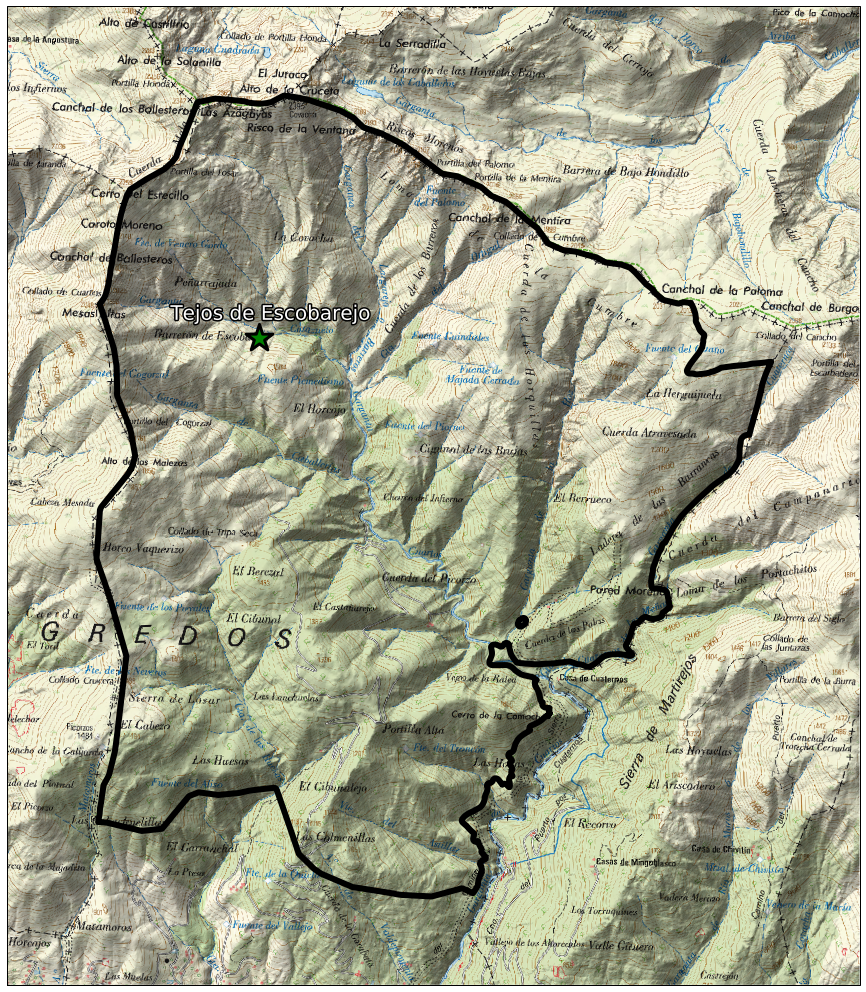

In [65]:
import psycopg2
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as PathEffects
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs
from config import config

zonas = ['jerte', 'tornavacas', 'losar', 'madrigal']

for zona in zonas:
    params = config()
    conn = psycopg2.connect(**params)
    proj = ccrs.epsg('25830')

#     # Localización respecto a ZEC
#     zec = gpd.read_file('../BRUTOS/ZEC/Sierra_Gredos_y_Valle_Jerte.shp')
#     ze = gpd.read_postgis('select * from zona_estudio_{}'.format(zona), conn)
#     lim = zec.bounds.iloc[0]

#     fig = plt.figure(figsize=(24,18))
#     ax = plt.axes(projection=proj)

#     buffer = 1000
#     ax.set_extent([lim['minx'] - buffer, lim['maxx'] + buffer, lim['miny'] - buffer, lim['maxy'] + buffer], crs=proj)
#     ax.add_wms(wms='https://www.ign.es/wms-inspire/mapa-raster', layers=['mtn_rasterizado'])
#     ax.add_geometries(ze['geom'], crs=proj, facecolor=(0,0,0,0), edgecolor='black', linewidth=6)
#     zec.plot(ax=ax, alpha=0.5)
#     fig.savefig('static/images/zec_{}'.format(zona), bbox_inches='tight', pad_inches=0)
#     plt.show()
#     plt.close(fig)

#     # MODELOS DE COMBUSTIBLE
#     mod_comb = gpd.read_postgis('select a.* from mod_comb a, zona_estudio_{} b where st_intersects(a.geom, b.geom)'.format(zona), conn)
#     num_colors = len(mod_comb.rt_0609.unique())
#     YGB = cm.get_cmap('YlGn', num_colors - 1)
#     YGB_array = YGB(np.linspace(0, 1, num_colors - 1))
#     roth_colors_array = np.insert(YGB_array, 0, [0,0,0,1], axis=0)
#     roth_colors = ListedColormap(roth_colors_array)

    ze = gpd.read_postgis('select * from zona_estudio_{}'.format(zona), conn)
    lim = ze.bounds.iloc[0]
        
#     fig = plt.figure(figsize=(24,18))
#     ax = plt.axes(projection=proj)

#     buffer = 1000
#     ax.set_extent([lim['minx'] - buffer, lim['maxx'] + buffer, lim['miny'] - buffer, lim['maxy'] + buffer], crs=proj)
#     ax.add_geometries(ze['geom'], crs=proj, facecolor=(0,0,0,0), edgecolor='black', linewidth=6)
#     mod_comb.plot(ax=ax, column='rt_0609', legend=True, cmap=roth_colors)
#     fig.savefig('static/images/mod_comb_{}'.format(zona), bbox_inches='tight', pad_inches=0)
#     plt.show()
#     plt.close(fig)

    # ÁRBOLES SINGULARES
    arboles = gpd.read_postgis('select nombre, st_transform(geom, 25830) as geom from arboles_singulares', conn)
    if zona == 'losar':
        arb = arboles[arboles.intersects(ze.iloc[0].geom)]

        fig = plt.figure(figsize=(24,18))
        ax = plt.axes(projection=proj)

        buffer = 1000
        ax.set_extent([lim['minx'] - buffer, lim['maxx'] + buffer, lim['miny'] - buffer, lim['maxy'] + buffer], crs=proj)
        ax.add_geometries(ze['geom'], crs=proj, facecolor=(0,0,0,0), edgecolor='black', linewidth=6)
        arb.plot(ax=ax, color='green', marker='*', markersize=800, edgecolor='black', linewidth=3)
        texto = ax.text(arb.iloc[0].geom.x - 1000, arb.iloc[0].geom.y + 200, arb.iloc[0].nombre, fontsize=20, color='white')
        texto.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')])
        ax.add_wms(wms='https://www.ign.es/wms-inspire/mapa-raster', layers=['mtn_rasterizado'])
        fig.savefig('static/images/arboles_singulares_losar'.format(zona), bbox_inches='tight', pad_inches=0)
        plt.show()
        plt.close(fig)

    # HABITATS

#     habitats = gpd.read_postgis('''select codue, generico, prioritari, st_union(a.geom) as geom 
#                                 from atlashabitats2005_extremadura a, 
#                                 zona_estudio_{} b 
#                                 where st_intersects(st_transform(a.geom, 25830), b.geom)
#                                 group by codue, generico, prioritari
#                                 '''.format(zona), conn)

#     habitats_prioritarios = habitats[(habitats.prioritari == '*')]
#     habitats = habitats[(habitats.prioritari == 'Np')]
# #     fig = plt.figure(figsize=(24,18))
# #     ax = plt.axes(projection=ccrs.epsg('23030'))

# #     buffer = 1000

# #     habitats_prioritarios.plot(ax=ax, column='nom_comun', legend=True)
# #     ax.set_extent([lim['minx'] - buffer, lim['maxx'] + buffer, lim['miny'] - buffer, lim['maxy'] + buffer], crs=proj)
# #     ax.add_geometries(ze['geom'], crs=ccrs.epsg('25830'), facecolor=(0,0,0,0), edgecolor='black', linewidth=6)
# #     fig.savefig('static/images/habitats_prioritarios_{}'.format(zona), bbox_inches='tight', pad_inches=0)
# #     plt.show()
# #     plt.close(fig)
#     for key, value in habitats.iterrows():
#         display(value.generico, value.codue)
#         a = []
#         a.append(value.geom)
#         fig = plt.figure(figsize=(24,18))
#         ax = plt.axes(projection=ccrs.epsg('23030'))

#         buffer = 1000

#         ax.set_extent([lim['minx'] - buffer, lim['maxx'] + buffer, lim['miny'] - buffer, lim['maxy'] + buffer], crs=proj)
#         ax.add_geometries(a, crs=ccrs.epsg('23030'))
        
#         ax.add_geometries(ze['geom'], crs=ccrs.epsg('25830'), facecolor=(0,0,0,0), edgecolor='black', linewidth=6)
# #         fig.savefig('static/images/habitats_{}_{}_{}'.format(value.codue, value.generico, zona), bbox_inches='tight', pad_inches=0)
#         plt.show()
#         plt.close(fig)
conn.close()